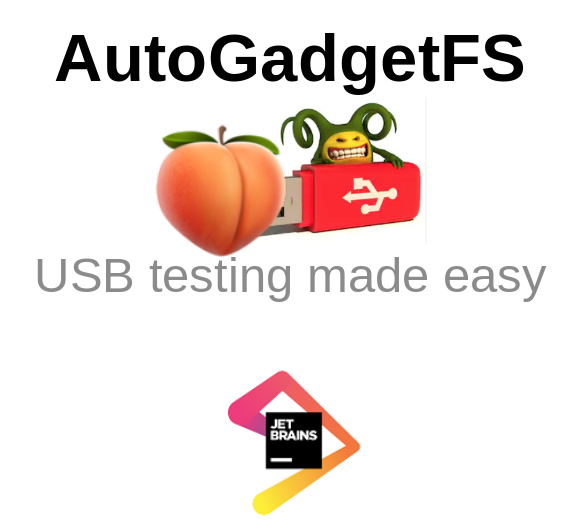

In [97]:
import libagfs

In [98]:
x =  libagfs.agfs()

***************************************
* AutoGadgetFS: USB testing made easy *
***************************************


In [99]:
x.findSelect()

Give your project a name?!: Demo1
0 : Linux 5.4.0-kali4-amd64 xhci-hcd:3:7531
1 : Linux 5.4.0-kali4-amd64 xhci-hcd:2:7531
2 : VIA Labs, Inc.:2071:8457
3 : Linux 5.4.0-kali4-amd64 xhci-hcd:3:7531
4 : Nuvoton:20764:1046
5 : None:57506:1161
6 : CN09357GLOG008CLA8P2A01:26403:3141
7 : SINO WEALTH:4102:9610
8 : VIA Technologies Inc.         :258:8457
9 : Logitech:50475:1133
10 : VIA Labs, Inc.:10263:8457
11 : Linux 5.4.0-kali4-amd64 xhci-hcd:2:7531
---> Select a device: 4
DEVICE ID 0416:511c on Bus 001 Address 012 =================
 bLength                :   0x12 (18 bytes)
 bDescriptorType        :    0x1 Device
 bcdUSB                 :  0x110 USB 1.1
 bDeviceClass           :    0x0 Specified at interface
 bDeviceSubClass        :    0x0
 bDeviceProtocol        :    0x0
 bMaxPacketSize0        :   0x40 (64 bytes)
 idVendor               : 0x0416
 idProduct              : 0x511c
 bcdDevice              :  0x100 Device 1.0
 iManufacturer          :    0x1 Nuvoton
 iProduct               : 

In [100]:
print(hex(x.epin))
print(hex(x.epout))
print(x.SelectedDevice)

0x81
0x2
Demo1-Nuvoton-1046-20764-1583520221.3661065


In [13]:
#Configure and setup the usb gadget
#below image is of the host machine that the pi zero is connected to prior to running the gadget

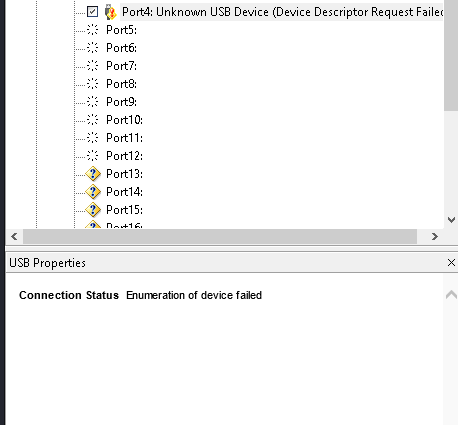

In [101]:
x.setupGadgetFS()

setting up: Nuvoton
Aquiring info about the device for Gadetfs

are you going to configure this gadget to work with windows [y/n] ?y
0 ]  b'05010900a101150026ff0019002900750895408102190029009102c0'
1 ]  b''
Which report would you like to use? 0
- Creating Bash script!

- Done wrote bash script. Try testing your gadget

Do you want to push the gadget to the Pi zero ?[y/n] y
Enter the ip address of the Pi zero: 192.168.254.126
Enter the port of the Pi zero: 22
Enter the username: pi
········
Connecting...
Sending...
Done!
Do you want to run the gadget? [y/n]y
********************************
* Gadget should now be running *
********************************


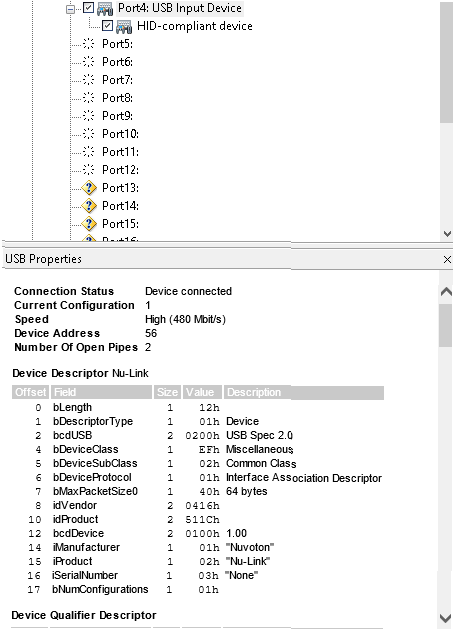

In [15]:
#Start the router on the pi zero:
    # ssh into the pi zero and run the router.py
        # the option -l defines the Max packet size
        # the option -ip is the ip address of the rabbitMQ server

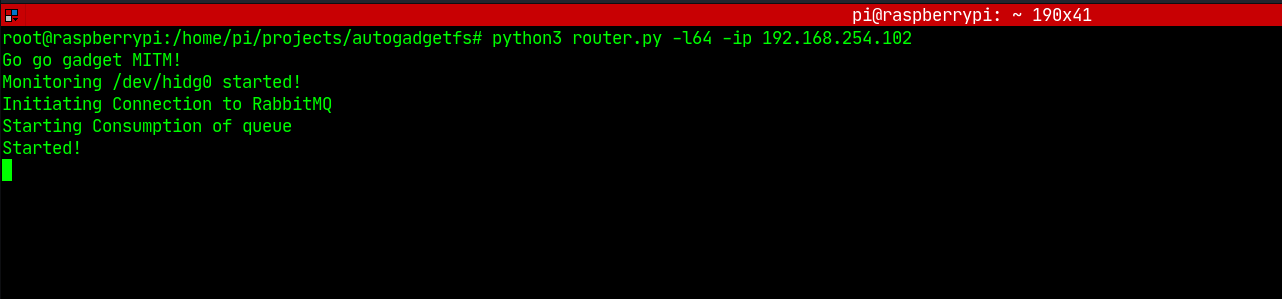

start the software that uses the device on the host machine
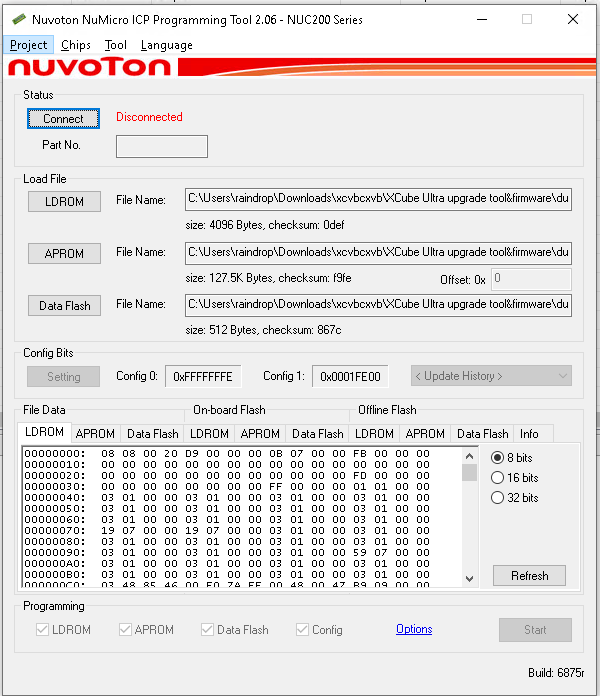

In [102]:
#start the man in the middle sniffing
x.startMITMusbWifi()

Connected to RabbitMQ, starting consumption!
Connected to exchange, we can send to host!
VVV++++++++++++++++FROM HOST
 b'\x01>\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff'
VVV++++++++++++++++FROM HOST
 b'\x02>\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff'
VVV++++++++++++++++FROM HOST
 b'\x03\x14\xfb\x00\x00\x00\x01\xff\x00\x00\x00\x01\x00P\x00\x00\x00\x00\xff\xff\xff\xff\x00\x00\x1d\x98\xf0\x86\x02\x07\x98R\xd0\x91\x8f\x12=\xd1\xd4\x81\xa8\x9b\xe7\xb8\xf2\x06m\xcc\xcab-\xed{\x18F\xd5\xab\xec\xe3\xe1\x0e\xb0\xab,'
VVV++++++++++++++++FROM HOST
 b'\x04\x14\xfb\x00\x00\x00\x01\x00\x00\x00\x

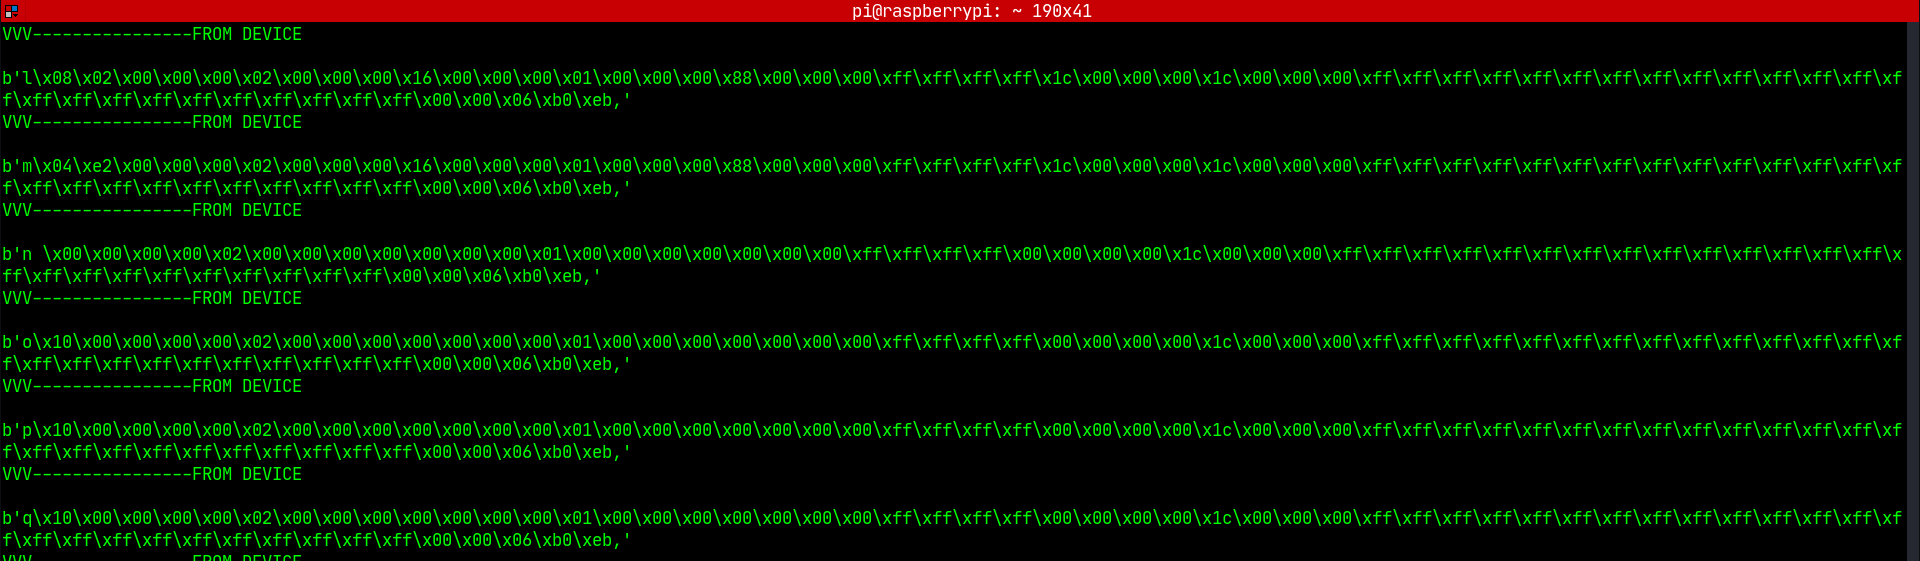

In [18]:
#Host side software has successfully connected to the device and you can sniff traffic bidirectional

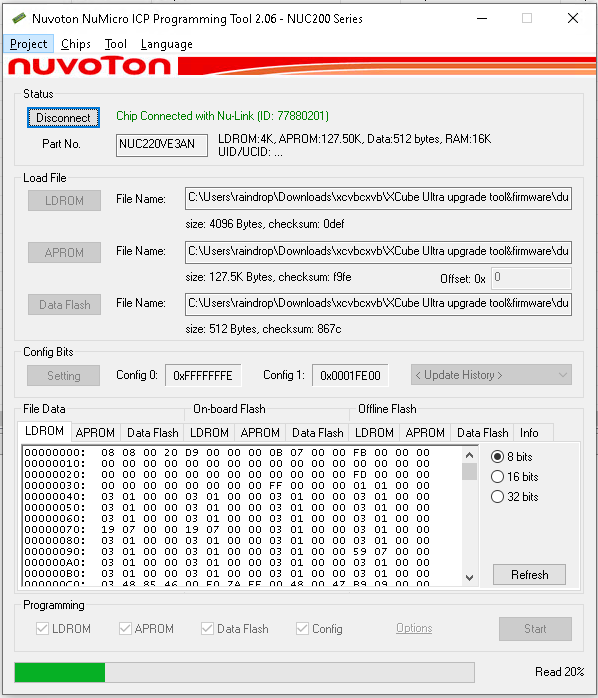

In [103]:
#stop man in the middle
x.stopMITMusbWifi()

**********************************
* Thread Terminated Successfully *
**********************************
**************************************
* Sniffing has stopped successfully! *
**************************************
***********************
* MITM Proxy stopped! *
***********************
***************************************
* MITM Proxy has now been terminated! *
***************************************


In [104]:
#clear all the rabbitMQ queues
x.clearqueues()

cleared todevice queue
cleared tohost queue
cleared tonull queue
cleared edap queues


In [105]:
#enumerate possible control transfer requests on the device
    #the fuzz param:
        #fast -> limited bmRequests
        #full -> the full monty , takes time and is somewhat dangerous due to set requests
        #results are stored in the folder devEnumCT/
x.devEnumCtrltrnsf(fuzz='fast')

***********
* started *
***********
*************************
* Now at bmRequest 0x81 *
*************************
*******************************
Found Valid Control Transfer request on device: Demo1-Nuvoton-1046-20764-1583520221.3661065
bmRequest=0x81, bRequest=0x00,wValue=0x00 , wIndex=0x00, data_length=0xfff
received: b'\x00\x00'...[SNIP]
*******************************
Found Valid Control Transfer request on device: Demo1-Nuvoton-1046-20764-1583520221.3661065
bmRequest=0x81, bRequest=0x00,wValue=0x01 , wIndex=0x00, data_length=0xfff
received: b'\x00\x00'...[SNIP]
*******************************
Found Valid Control Transfer request on device: Demo1-Nuvoton-1046-20764-1583520221.3661065
bmRequest=0x81, bRequest=0x00,wValue=0x02 , wIndex=0x00, data_length=0xfff
received: b'\x00\x00'...[SNIP]
*******************************
Found Valid Control Transfer request on device: Demo1-Nuvoton-1046-20764-1583520221.3661065
bmRequest=0x81, bRequest=0x00,wValue=0x03 , wIndex=0x00, data_length=0xf

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  


*******************************
Found Valid Control Transfer request on device: Demo1-Nuvoton-1046-20764-1583520221.3661065
bmRequest=0x81, bRequest=0x00,wValue=0x76 , wIndex=0x00, data_length=0xfff
received: b'\x00\x00'...[SNIP]
*******************************
Found Valid Control Transfer request on device: Demo1-Nuvoton-1046-20764-1583520221.3661065
bmRequest=0x81, bRequest=0x00,wValue=0x77 , wIndex=0x00, data_length=0xfff
received: b'\x00\x00'...[SNIP]
*******************************
Found Valid Control Transfer request on device: Demo1-Nuvoton-1046-20764-1583520221.3661065
bmRequest=0x81, bRequest=0x00,wValue=0x78 , wIndex=0x00, data_length=0xfff
received: b'\x00\x00'...[SNIP]
*******************************
Found Valid Control Transfer request on device: Demo1-Nuvoton-1046-20764-1583520221.3661065
bmRequest=0x81, bRequest=0x00,wValue=0x79 , wIndex=0x00, data_length=0xfff
received: b'\x00\x00'...[SNIP]
*******************************
Found Valid Control Transfer request on device: 

In [37]:
#send a control transfer request to the device
    #devctrltrnsf(bmRequestType, bRequest, wValue, wIndex, wLength)
    #or
    #x.device.ctrl_transfer(bmRequestType, bRequest, wValue, wIndex, wLength)
response = x.device.ctrl_transfer(0x81,0x6,0x2200,0,0xA)
import binascii
print(binascii.hexlify(response))

b'05010900a101150026ff'


In [108]:
#Send random packets to the device
#def devrandfuzz(self, howmany=1000, size='fixed',timeout=0.5):
#        """
#        this method allows you to create fixed or random size packets created using urandom
#        :param howmany: how many packets to be sent to the device`
#        :param size: string value whether its fixed or random size
#        :param timeout: timeOUT !
#        :return: None
#        """
x.devrandfuzz(howmany=3,size='fixed')

****************VVV Packet #0  VVV**********************
sent-->
 b'e75bb5bfe4dbe5e2cfa142def9cc2c6bd2f743aacd0028a564da17fefd91262ba7422258e1dad69a87f54b415e1ecfca9a554840b5f89f91b9713b8dcb4b5215'
received -->
 b'e7040000000009200100000288778e01860100b20000362bcb5d000002079852d0918f123dd1d481a89be7b8f2066dccca622ded7b1846d5abece3e10eb0ab2c'


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  # Remove the CWD from sys.path while we load stuff.


****************VVV Packet #1  VVV**********************
sent-->
 b'469599b163bf006135faa4237516ad27f515a34d1f2f25ae752fd89405af46bc20fdf033d45d8e4b6b19faf0f660d438a170c0d5557dd40977a7086b3ad827c4'
received -->
 b'c6040000000009200100000288778e01860100b20000362bcb5d000002079852d0918f123dd1d481a89be7b8f2066dccca622ded7b1846d5abece3e10eb0ab2c'
****************VVV Packet #2  VVV**********************
sent-->
 b'88a3d8dd3d70ddd2981883d15708da53fc754b8c477a15b5bfaa491558c8cdeda7ba6d13550cbe168e8a562f329dfe1fc6eefba8801b0d9a8dafec9a127db00c'
received -->
 b'88040000000009200100000288778e01860100b20000362bcb5d000002079852d0918f123dd1d481a89be7b8f2066dccca622ded7b1846d5abece3e10eb0ab2c'


In [109]:
x.devrandfuzz(howmany=3,size='random')

****************VVV Packet #0  VVV**********************
sent-->
 b'474e90cfc50352995166fd75a752825c611116349801f91203'
received -->
 b'c7040000000009200100000288778e01860100b20000362bcb5d000002079852d0918f123dd1d481a89be7b8f2066dccca622ded7b1846d5abece3e10eb0ab2c'


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  """Entry point for launching an IPython kernel.


****************VVV Packet #1  VVV**********************
sent-->
 b'8b2388756d8dcd8bf48388d25f53c6e8c60d30e8d4e1437e7ff7c715'
received -->
 b'8b040000000009200100000288778e01860100b20000362bcb5d000002079852d0918f123dd1d481a89be7b8f2066dccca622ded7b1846d5abece3e10eb0ab2c'
****************VVV Packet #2  VVV**********************
sent-->
 b'804ed054324502d65f14746bdb419121047c9de62ed14d596b6f4e36db68b5b81f765c3cef'
received -->
 b'80040000000009200100000288778e01860100b20000362bcb5d000002079852d0918f123dd1d481a89be7b8f2066dccca622ded7b1846d5abece3e10eb0ab2c'


In [62]:
#Send random packets to the host
#    def hstrandfuzz(self, howmany=1, size=None, min=None, max = None, timeout=0.5):
#        """
#        this method allows you to create fixed or random size packets created using urandom
#        :param howmany: how many packets to be sent to the device`
#        :param size: fixed size packet
#        size = 10 to generate a length 10 packet 
#        :param min minimum size value to generate a packet
#        :param max maximum size value to generate a packet
#        :param timeout: timeOUT !
#        :return: None
#        """

x.hostwrite("aaaaaA")

x.hostwrite("aaaaaA")
x.hostwrite("0A0B0C0D")

*****************************
* Queues to host are yours! *
*****************************


**packets have been received from the queue and sent over to the host machine
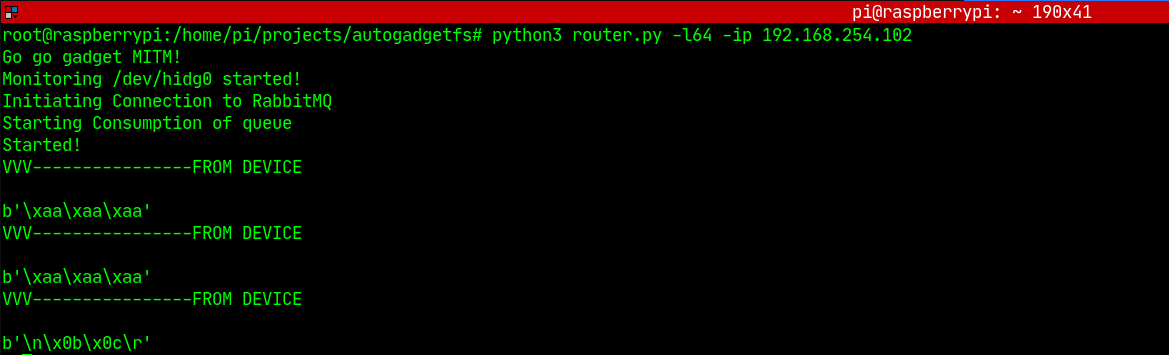

In [63]:
x.stopQueuewrite()

In [112]:
#create a new project
x.newProject()

[-] Releasing the Interface
Releasing interfaces :
	2
[-] Attaching the kernel driver
Releasing interface: 0
Releasing interface: 1
Releasing interface: 2
[-] Device released!
Give your project a name?!: sdfsdf
0 : Linux 5.4.0-kali4-amd64 xhci-hcd:3:7531
1 : Linux 5.4.0-kali4-amd64 xhci-hcd:2:7531
2 : VIA Labs, Inc.:2071:8457
3 : Linux 5.4.0-kali4-amd64 xhci-hcd:3:7531
4 : Logitech:50484:1133
5 : None:57506:1161
6 : CN09357GLOG008CLA8P2A01:26403:3141
7 : SINO WEALTH:4102:9610
8 : VIA Technologies Inc.         :258:8457
9 : Logitech:50475:1133
10 : VIA Labs, Inc.:10263:8457
11 : Linux 5.4.0-kali4-amd64 xhci-hcd:2:7531
---> Select a device: 4
DEVICE ID 046d:c534 on Bus 001 Address 013 =================
 bLength                :   0x12 (18 bytes)
 bDescriptorType        :    0x1 Device
 bcdUSB                 :  0x200 USB 2.0
 bDeviceClass           :    0x0 Specified at interface
 bDeviceSubClass        :    0x0
 bDeviceProtocol        :    0x0
 bMaxPacketSize0        :    0x8 (8 bytes)


In [113]:
x.setupGadgetFS()

setting up: Logitech
Aquiring info about the device for Gadetfs

are you going to configure this gadget to work with windows [y/n] ?y
0 ]  b'05010906a101050719e029e71500250175019508810281039505050819012905910295017503910195067508150026a400050719002aa4008100c0'
1 ]  b'05010902a10185020901a1000509190129101500250195107501810205011601f826ff07750c95020930093181061581257f7508950109388106050c0a380295018106c0c0050c0901a1018503751095021501268c0219012a8c028100c005010980a10185047502950115012503098209810983816075068103c00600ff0901a101851075089506150026ff000901810009019100c00600ff0902a101851175089513150026ff000902810009029100c0'
Which report would you like to use? 0
- Creating Bash script!

- Done wrote bash script. Try testing your gadget

Do you want to push the gadget to the Pi zero ?[y/n] y
Enter the ip address of the Pi zero: pi
Enter the port of the Pi zero: 22
Enter the username: pi
········
Connecting...
Sending...
Done!
Do you want to run the gadget? [y/n]y
********************************

In [114]:
#Sniff the endpoint IN interface send it to the queue or to a pesudo terminal
#def startSniffReadThread(self,endpoint=None, pts=None, queue=None,timeout=0,genpkts=0,savetofile=0):
#       """ This is a thread to continuously read the replies from the device and dependent on what you pass to the method either pts or queue
#       :param endpoint: endpoint address you want to read from
#       :param pts: if you want to read the device without queues and send output to a specific tty
#       :param queue: if you will use the queues for a full proxy between target and host
#       :param channel: this is automatically passed if you use the self.startMITMusbWifi()
#       :param savetofile: fill in ********************
#       :param genpkts: fill in ********************
#       :return: None
#       """

x.startSniffReadThread(endpoint=x.epin,pts=1)

Open a new terminal and type 'tty' and input the pts number: (/dev/pts/X) /dev/pts/3
Press Enter when ready..on /dev/pts/3


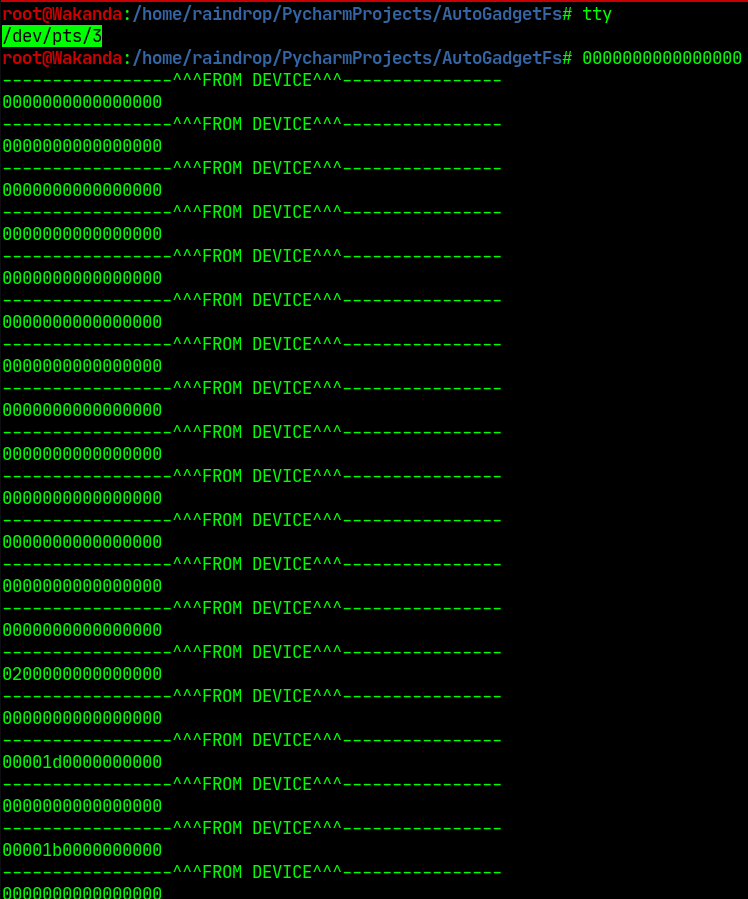

In [115]:
#stop the sniffing
x.stopSniffing()

**************************************
* Sniffing has stopped successfully! *
**************************************


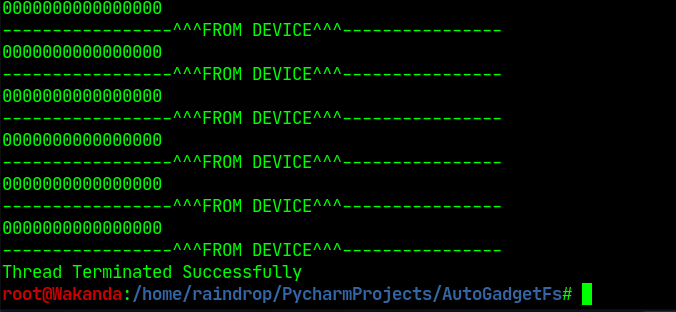

In [123]:
#send random generated packets to the host
 #def hstrandfuzz(self, howmany=1, size=None, min=None, max = None, timeout=0.5):
 #       """
 #       this method allows you to create fixed or random size packets created using urandom
 #       :param howmany: how many packets to be sent to the device`
 #       :param size: fixed size packet length
 #                    size = 10 to generate a length 10 packet
 #       :param min minimum size value to generate a packet
 #       :param max maximum size value to generate a packet
 #       :param timeout: timeOUT !
 #       :return: None
 #       """
x.hstrandfuzz(howmany=3,size=8,timeout=0)

*****************************
* Queues to host are yours! *
*****************************
*****************************
* Queues to host are yours! *
*****************************
****************VVV Packet #0  VVV**********************
sent-->
 b'bc1a1aa32092ef0d'
****************VVV Packet #1  VVV**********************
sent-->
 b'591f4089ecdb9f9f'
****************VVV Packet #2  VVV**********************
sent-->
 b'4f2fa6601689be80'


Exception in thread Thread-156:
Traceback (most recent call last):
  File "/usr/lib/python3.7/threading.py", line 926, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.7/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "/home/raindrop/PycharmProjects/AutoGadgetFs/libagfs.py", line 468, in rabbitmqfakeheartbeat
    if self.hbkill == 1:
  File "/usr/local/lib/python3.7/dist-packages/pika/adapters/blocking_connection.py", line 2247, in basic_publish
    mandatory=mandatory)
  File "/usr/local/lib/python3.7/dist-packages/pika/channel.py", line 421, in basic_publish
    self._raise_if_not_open()
  File "/usr/local/lib/python3.7/dist-packages/pika/channel.py", line 1389, in _raise_if_not_open
    raise exceptions.ChannelWrongStateError('Channel is closed.')
pika.exceptions.ChannelWrongStateError: Channel is closed.



**Packet received from Queue and sent to the host machine
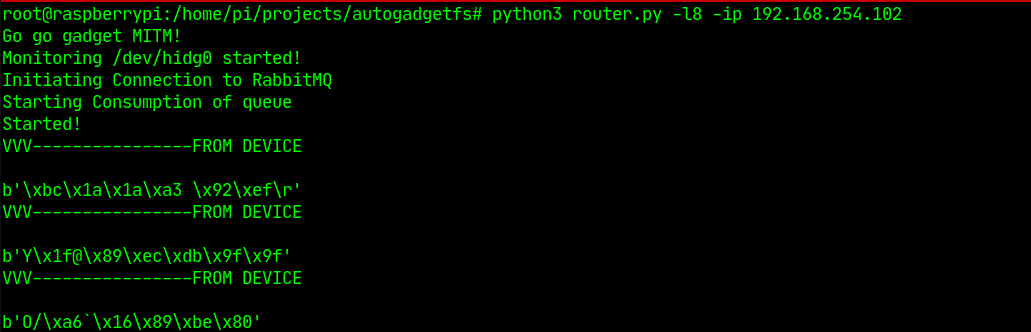

**Packet showed in host machine
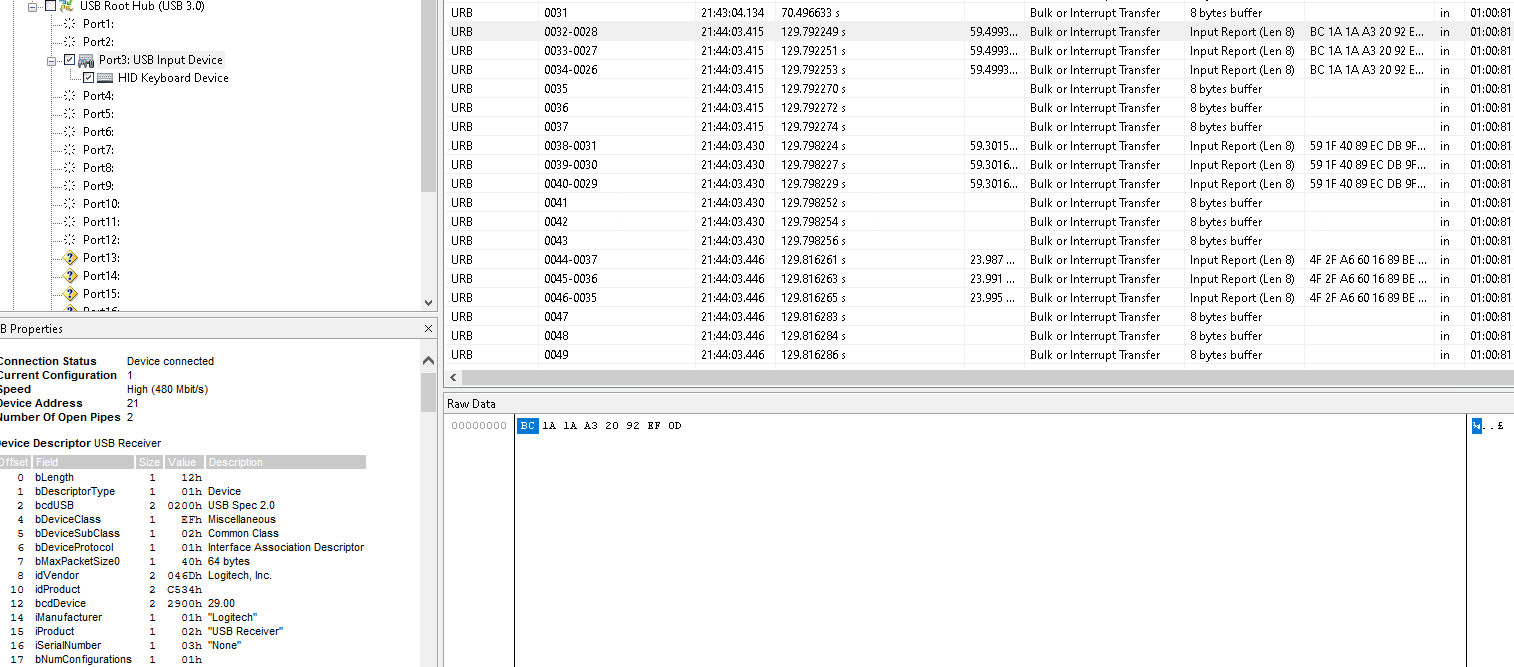

In [125]:
#Release the device and attach the kernel drivers
x.releasedev()

[-] Releasing the Interface
Releasing interfaces :
	2
[-] Attaching the kernel driver
Releasing interface: 0
Interface reattached
Releasing interface: 1
Interface reattached
Releasing interface: 2
[-] Device released!


In [126]:
#New project with a device that leaks data when requesting the HID report with the length set to 0xfff
#in the decoded data below you'll see contents of memory as it reads out of bound
x.newProject()

[-] Releasing the Interface
Releasing interfaces :
	2
[-] Attaching the kernel driver
Releasing interface: 0
Releasing interface: 1
Releasing interface: 2
[-] Device released!
Give your project a name?!: LeakDev
0 : Linux 5.4.0-kali4-amd64 xhci-hcd:3:7531
1 : Linux 5.4.0-kali4-amd64 xhci-hcd:2:7531
2 : VIA Labs, Inc.:2071:8457
3 : Linux 5.4.0-kali4-amd64 xhci-hcd:3:7531
4 : Fu Rui :17201:5171
5 : None:57506:1161
6 : CN09357GLOG008CLA8P2A01:26403:3141
7 : SINO WEALTH:4102:9610
8 : VIA Technologies Inc.         :258:8457
9 : Logitech:50475:1133
10 : VIA Labs, Inc.:10263:8457
11 : Linux 5.4.0-kali4-amd64 xhci-hcd:2:7531
---> Select a device: 4
DEVICE ID 1433:4331 on Bus 001 Address 014 =================
 bLength                :   0x12 (18 bytes)
 bDescriptorType        :    0x1 Device
 bcdUSB                 :  0x200 USB 2.0
 bDeviceClass           :    0x0 Specified at interface
 bDeviceSubClass        :    0x0
 bDeviceProtocol        :    0x0
 bMaxPacketSize0        :   0x40 (64 bytes)

In [127]:
#you can monitor the device interfaces while you are testing incase the device 
#changes its configuration when a request was sent to it or when you have interacted with the device.
x.startMonInterfaceChng()

********************************************
* Interface monitoring thread has started. *
********************************************
************************************************************************************
* 
Device Interfaces have changed!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
 *
************************************************************************************


In [128]:
#stop monitoring for device config changes
x.stopMonInterfaceChang()

***********************************************
* Monitoring of interface changes has stopped *
***********************************************


In [129]:
x.releasedev()

[-] Releasing the Interface
Releasing interfaces :
	1
[-] Attaching the kernel driver
Releasing interface: 1
[-] Device released!
